# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<00:00, 2004.45it/s]


# Main

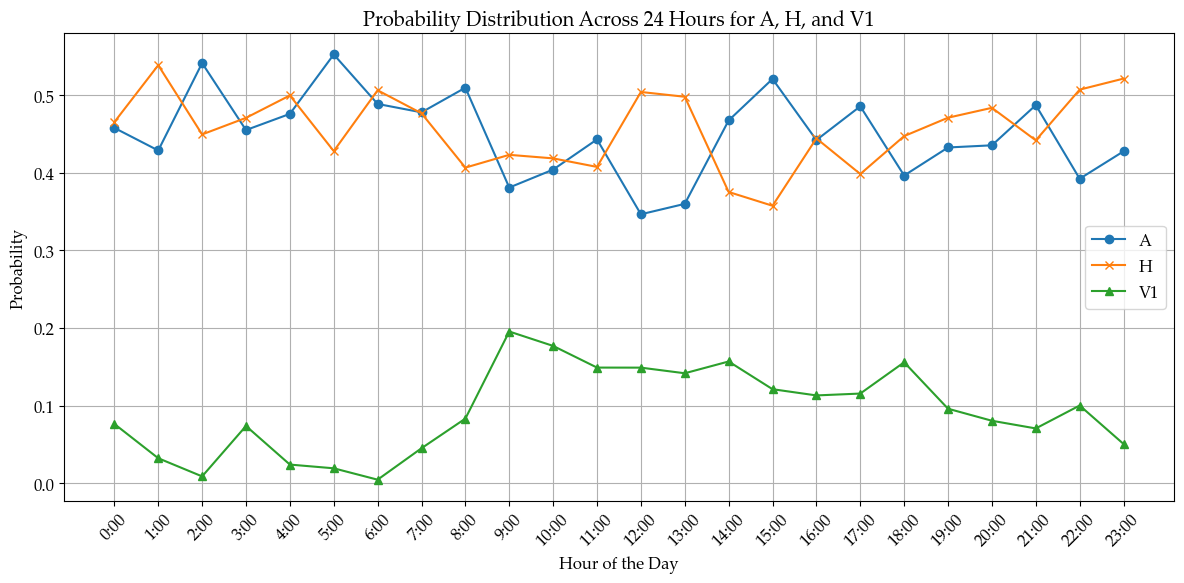

In [5]:
# Raw probabilities for each hour for A, H, and V1
probabilities = [
    (0.45801, 0.465509, 0.0764814), (0.428908, 0.538814, 0.0322795), (0.541539, 0.449588, 0.00887308),
    (0.455225, 0.470947, 0.073828), (0.476072, 0.499828, 0.0240996), (0.552618, 0.428086, 0.0192963),
    (0.488875, 0.506495, 0.00462997), (0.478057, 0.476798, 0.0451465), (0.509834, 0.406805, 0.0833616),
    (0.381115, 0.423292, 0.195594), (0.404257, 0.418724, 0.177017), (0.443176, 0.407725, 0.149099),
    (0.346676, 0.504296, 0.149029), (0.360097, 0.498123, 0.14178), (0.467625, 0.375405, 0.156969),
    (0.521087, 0.357667, 0.121245), (0.44232, 0.444462, 0.113217), (0.485821, 0.398559, 0.115619),
    (0.396623, 0.44744, 0.155938), (0.432771, 0.471142, 0.0960879), (0.435562, 0.483872, 0.0805665),
    (0.487359, 0.441968, 0.0706736), (0.392469, 0.507302, 0.100229), (0.427796, 0.521541, 0.0506629)
]

# Separating the probabilities for A, H, and V1
probabilities_A = [p[0] for p in probabilities]
probabilities_H = [p[1] for p in probabilities]
probabilities_V1 = [p[2] for p in probabilities]

hours = list(range(24))  # 24 hours

# Plotting the probabilities for A, H, and V1 over the 24-hour period
plt.figure(figsize=(12, 6))
plt.plot(hours, probabilities_A, label='A', marker='o')
plt.plot(hours, probabilities_H, label='H', marker='x')
plt.plot(hours, probabilities_V1, label='V1', marker='^')
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)  # Format x-axis labels as "hour:00"
plt.xlabel('Hour of the Day')
plt.ylabel('Probability')
plt.title('Probability Distribution Across 24 Hours for A, H, and V1')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


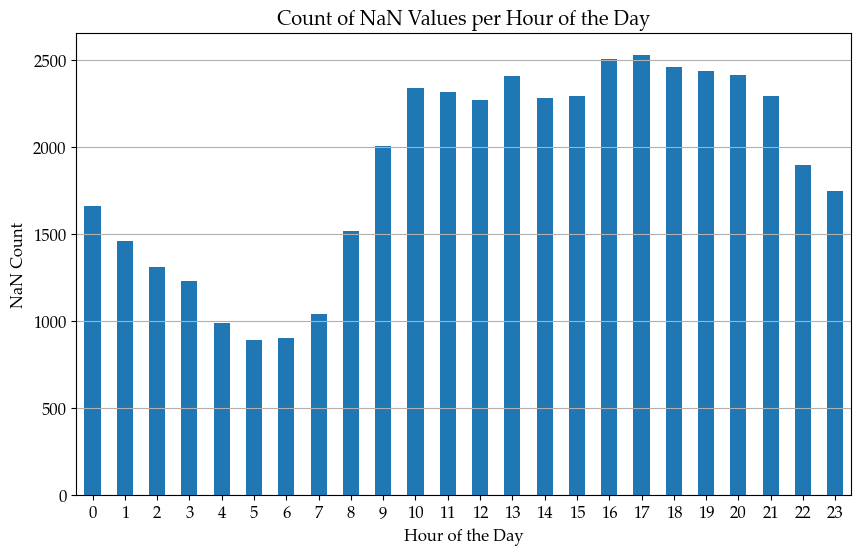

In [6]:

df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

# Extract the hour from the datetime column
df["hour"] = df["time_call_received"].dt.hour

# Count NaNs per hour
nan_counts_per_hour = df[df["time_ambulance_dispatch_to_hospital"].isna()].groupby("hour")["time_ambulance_dispatch_to_hospital"].size()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
nan_counts_per_hour.plot(kind="bar")
plt.title("Count of NaN Values per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("NaN Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


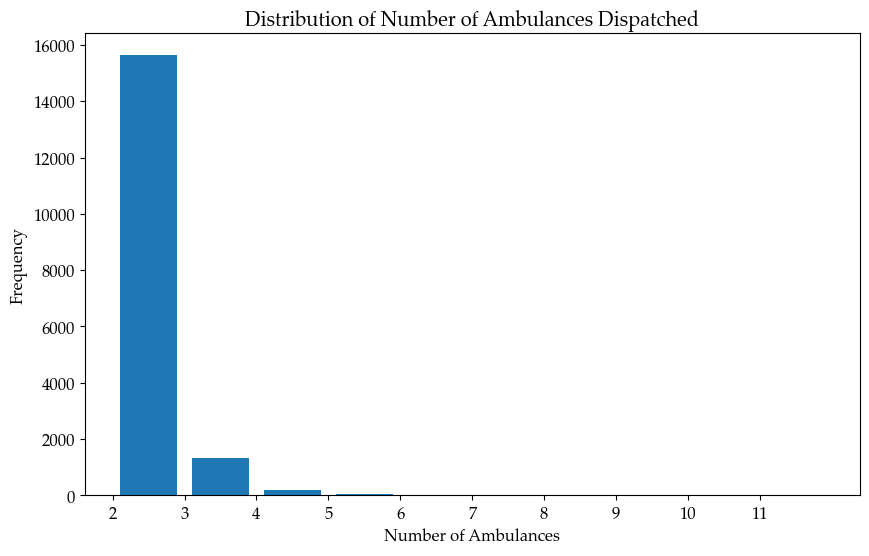

In [7]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

plt.figure(figsize=(10, 6))
plt.hist(df["resources_sent"], bins=np.arange(2, df["resources_sent"].max() + 1.5, 1), rwidth=0.8)
plt.xlabel("Number of Ambulances")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Ambulances Dispatched")
plt.xticks(np.arange(2, df["resources_sent"].max() + 1))
plt.show()


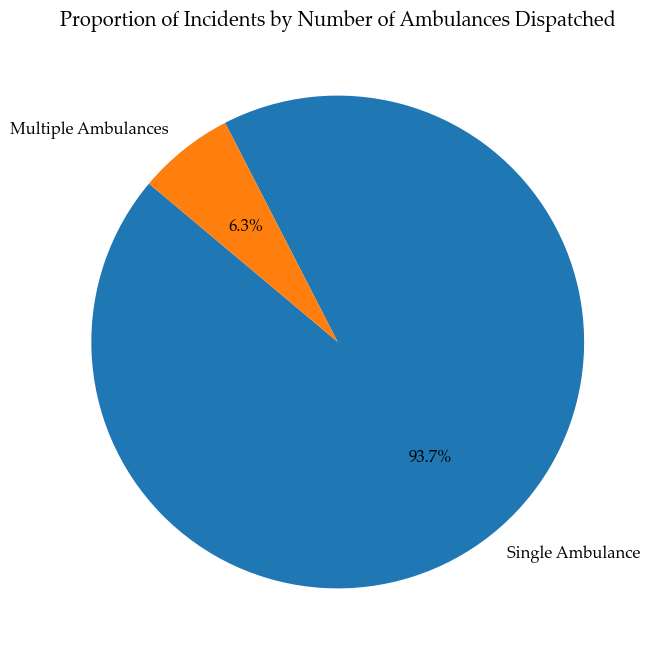

In [8]:
counts = df["resources_sent"].value_counts().sort_index()
single = counts[1] if 1 in counts else 0
multiple = counts[counts.index > 1].sum()

plt.figure(figsize=(8, 8))
plt.pie([single, multiple], labels=["Single Ambulance", "Multiple Ambulances"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Incidents by Number of Ambulances Dispatched")
plt.show()

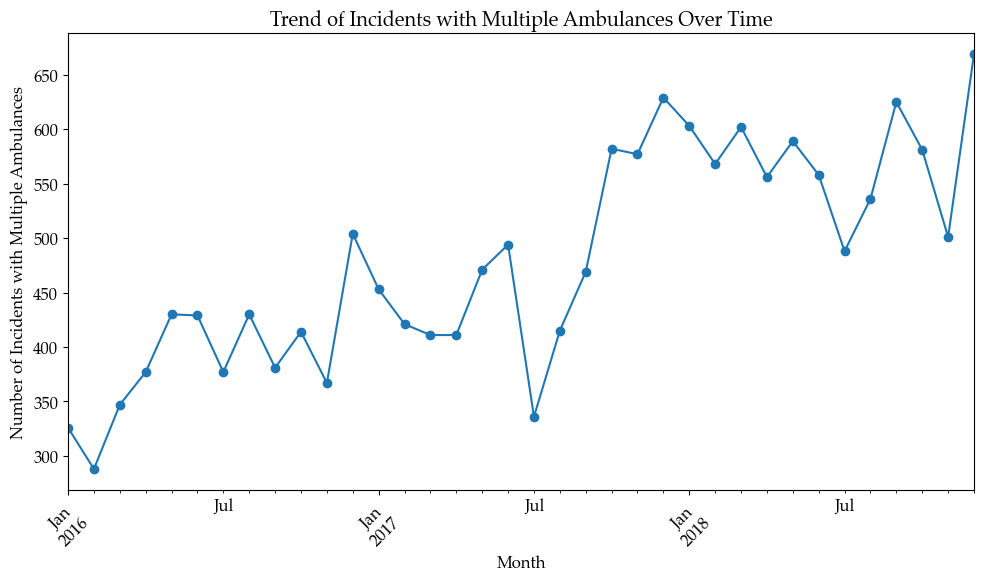

In [9]:
# Count the number of incidents with multiple ambulances by month
df["Month"] = df["time_call_received"].dt.to_period("M")
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

plt.figure(figsize=(10, 6))
multiple_ambulances_monthly.plot(kind="line", marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents with Multiple Ambulances")
plt.title("Trend of Incidents with Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


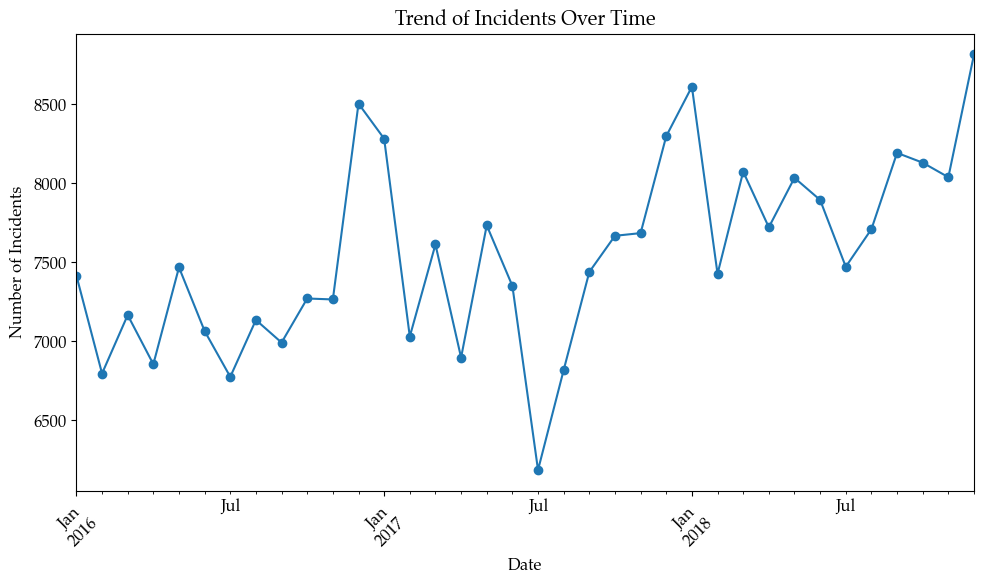

In [10]:
monthly_incidents = df.groupby("Month").size()

plt.figure(figsize=(10, 6))
monthly_incidents.plot(kind="line", marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.title("Trend of Incidents Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


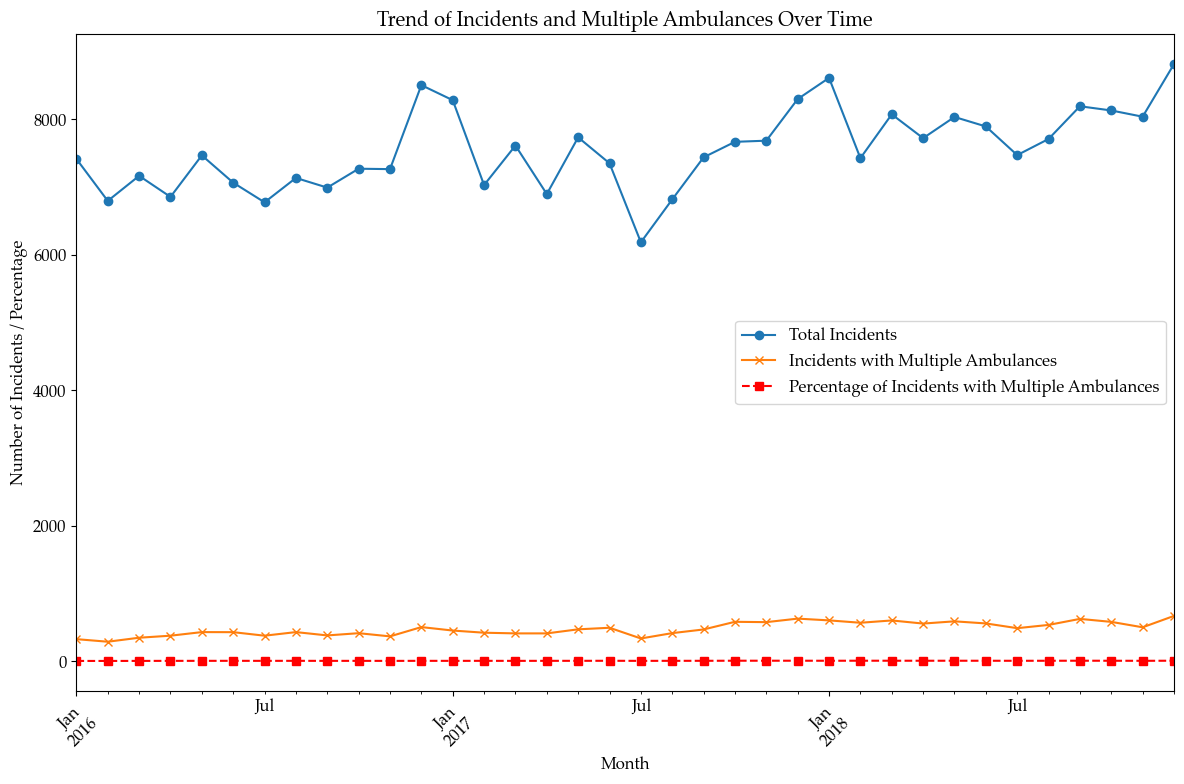

In [11]:
# Calculate the total number of incidents per month
monthly_incidents = df.groupby("Month").size()

# Calculate the number of incidents with multiple ambulances per month
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

# Calculate the percentage of incidents with multiple ambulances
percentage_multiple_ambulances = (multiple_ambulances_monthly / monthly_incidents) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Plot total incidents per month
monthly_incidents.plot(kind="line", marker='o', label='Total Incidents')

# Plot incidents with multiple ambulances per month
multiple_ambulances_monthly.plot(kind="line", marker='x', label='Incidents with Multiple Ambulances')

# Plot percentage of incidents with multiple ambulances
percentage_multiple_ambulances.plot(kind="line", linestyle='--', marker='s', color='red', label='Percentage of Incidents with Multiple Ambulances')

plt.xlabel("Month")
plt.ylabel("Number of Incidents / Percentage")
plt.title("Trend of Incidents and Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271837 entries, 0 to 271836
Data columns (total 92 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   triage_impression_during_call        271837 non-null  object        
 1   resource_id                          271837 non-null  object        
 2   resource_type                        271837 non-null  object        
 3   resources_sent                       271837 non-null  int64         
 4   time_call_received                   271837 non-null  datetime64[ns]
 5   time_incident_created                271837 non-null  datetime64[ns]
 6   time_resource_appointed              271837 non-null  datetime64[ns]
 7   time_ambulance_dispatch_to_scene     271837 non-null  datetime64[ns]
 8   time_ambulance_arrived_at_scene      271837 non-null  datetime64[ns]
 9   time_ambulance_dispatch_to_hospital  226628 non-null  datetime64[ns]
 

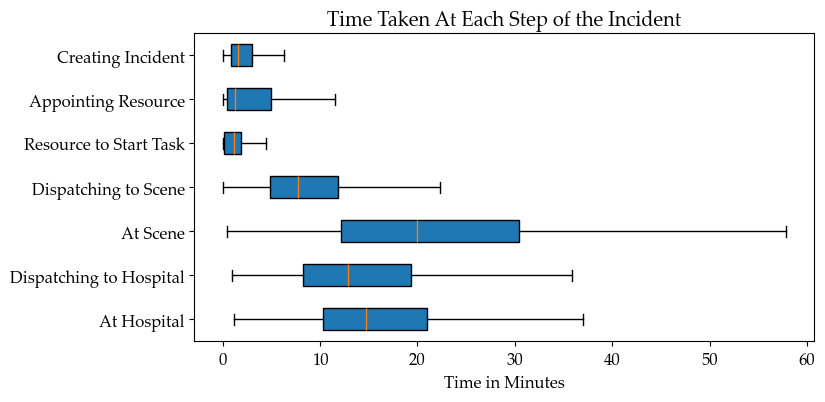

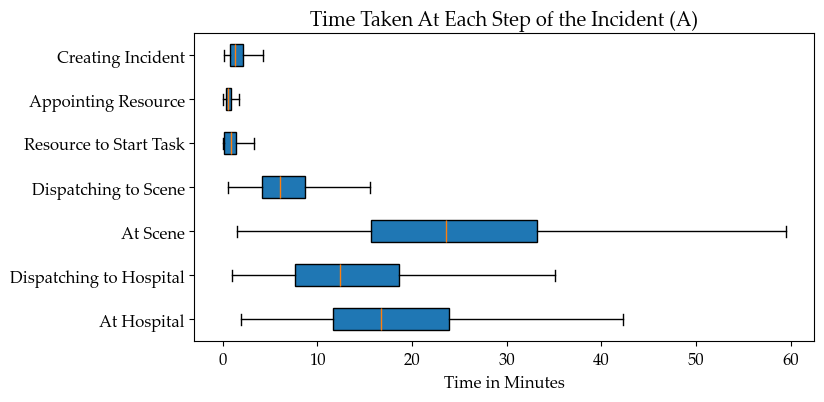

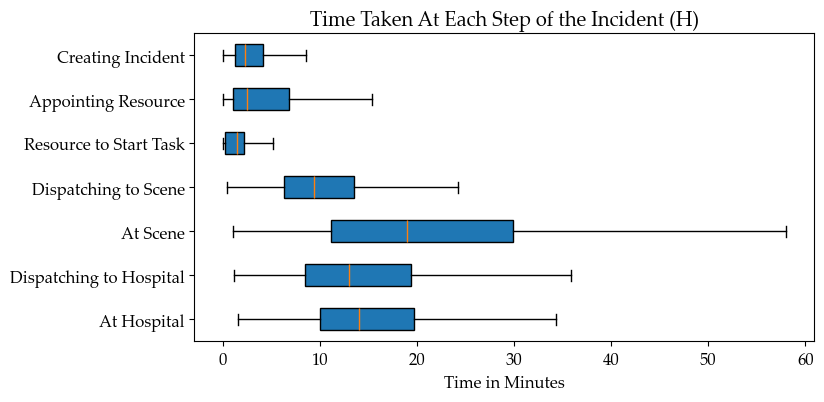

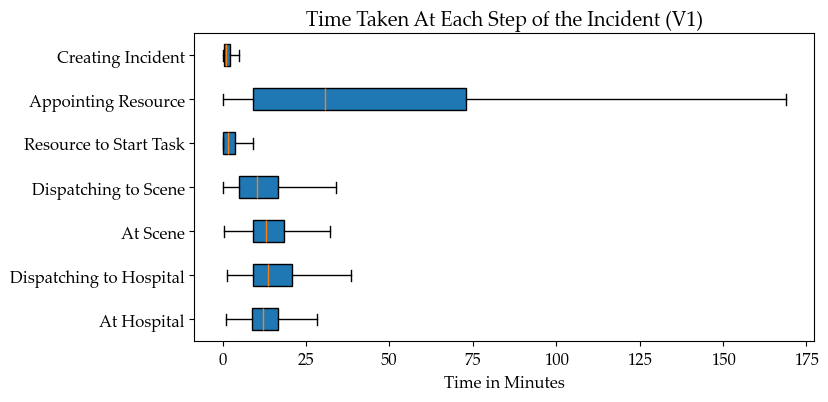

In [14]:
plotter.boxplot_time_at_steps(df)
plotter.boxplot_time_at_steps(df, triage_impression="A")
plotter.boxplot_time_at_steps(df, triage_impression="H")
plotter.boxplot_time_at_steps(df, triage_impression="V1")


In [15]:
dataframe = data_preprocessor.load_processed_incidents_dataframe()
dataframe = data_preprocessor._remove_duplicates(dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
#dataframe = data_preprocessor._remove_other_resource_types(dataframe)
#dataframe = data_preprocessor._count_resources_sent(dataframe)
#dataframe = data_preprocessor._remove_extra_resources(dataframe)

dataframe['triage_impression_during_call'] = dataframe['triage_impression_during_call'].replace(['V1', 'V2'], 'V')
dataframe['year'] = dataframe['time_call_received'].dt.year
dataframe = dataframe.groupby(['year', 'triage_impression_during_call']).size().unstack(fill_value=0)


In [16]:
data_to_compare = {
    "triage_impression_during_call": ["A", "H", "V"],
    "2016": [65878, 53975, 34816],
    "2017": [68413, 54419, 35679],
    "2018": [72253, 58921, 36923]
}
dataframe_to_compare = pd.DataFrame(data_to_compare).set_index("triage_impression_during_call").T

dataframe.index = dataframe.index.map(str)

dataframe["A SSB"] = dataframe_to_compare["A"]
dataframe["H SSB"] = dataframe_to_compare["H"]
dataframe["V SSB"] = dataframe_to_compare["V"]


,A % Difference,H % Difference,V % Difference
year,,,
2016,-12.834330,-5.117184,-21.783088
2017,-13.608525,-4.097833,-21.746686
2018,-15.733603,-4.612956,-20.098584


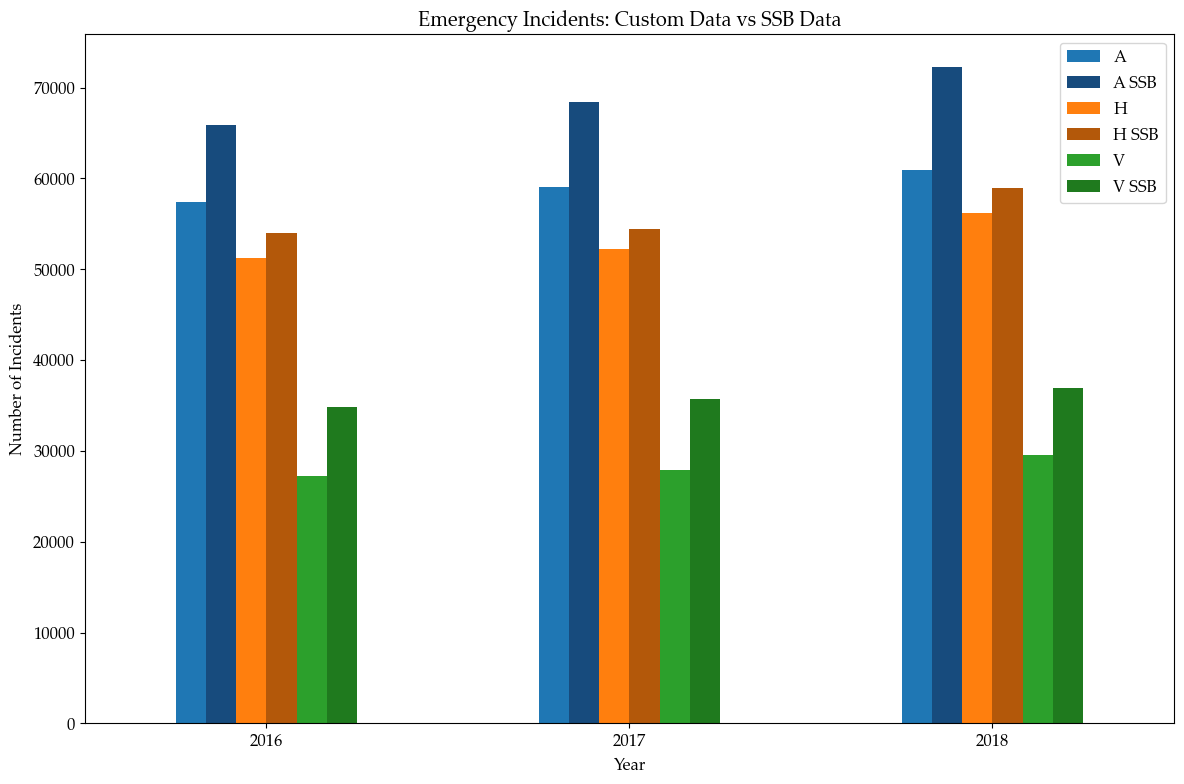

In [17]:
# Plotting
colors = ["#1f77b4", "#174b7d", "#ff7f0e", "#b3580a", "#2ca02c", "#1f7a1e"]
fig, ax = plt.subplots(figsize=(12, 8))
dataframe[['A', 'A SSB', 'H', 'H SSB', 'V', 'V SSB']].plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Incidents")
ax.set_title("Emergency Incidents: Custom Data vs SSB Data")
plt.xticks(rotation=0)
plt.legend(["A", "A SSB", "H", "H SSB", "V", "V SSB"], loc="upper right")
plt.tight_layout()

# Calculate and print percentage differences
percentage_diff = (dataframe[['A', 'H', 'V']] - dataframe[['A SSB', 'H SSB', 'V SSB']].values) / dataframe[['A SSB', 'H SSB', 'V SSB']].values * 100
percentage_diff.columns = ['A % Difference', 'H % Difference', 'V % Difference']
percentage_diff


In [18]:
total_diff = (dataframe[['A', 'H', 'V']].values.sum() - dataframe[['A SSB', 'H SSB', 'V SSB']].values.sum()) / dataframe[['A SSB', 'H SSB', 'V SSB']].values.sum() * 100
total_diff


-12.38517527328337

In [19]:
df = data_preprocessor.load_clean_incidents_dataframe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754811 entries, 0 to 754810
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   hastegrad         754802 non-null  object        
 1   tidspunkt         754811 non-null  datetime64[ns]
 2   tiltak_opprettet  754811 non-null  datetime64[ns]
 3   ressurs_id        754811 non-null  object        
 4   tiltak_type       754811 non-null  object        
 5   varslet           754333 non-null  datetime64[ns]
 6   rykker_ut         731707 non-null  datetime64[ns]
 7   ank_hentested     665649 non-null  datetime64[ns]
 8   avg_hentested     560737 non-null  datetime64[ns]
 9   ank_levsted       557995 non-null  datetime64[ns]
 10  ledig             754747 non-null  datetime64[ns]
 11  ssbid1000M        754811 non-null  int64         
 12  xcoor             754811 non-null  int64         
 13  ycoor             754811 non-null  int64         
 14  popT

In [20]:
temp_df = df.drop_duplicates(subset="ssbid1000M")

temp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5089 entries, 0 to 754612
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hastegrad         5089 non-null   object        
 1   tidspunkt         5089 non-null   datetime64[ns]
 2   tiltak_opprettet  5089 non-null   datetime64[ns]
 3   ressurs_id        5089 non-null   object        
 4   tiltak_type       5089 non-null   object        
 5   varslet           5080 non-null   datetime64[ns]
 6   rykker_ut         4181 non-null   datetime64[ns]
 7   ank_hentested     1773 non-null   datetime64[ns]
 8   avg_hentested     1773 non-null   datetime64[ns]
 9   ank_levsted       1769 non-null   datetime64[ns]
 10  ledig             5088 non-null   datetime64[ns]
 11  ssbid1000M        5089 non-null   int64         
 12  xcoor             5089 non-null   int64         
 13  ycoor             5089 non-null   int64         
 14  popTot            5089 non-

In [21]:
utm_to_population = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): pop for grid_id, pop in zip(temp_df["ssbid1000M"], temp_df["popTot"])}


In [22]:
print(utm_to_population)


{(264500, 6631500): 102, (242500, 6641500): 1329, (265500, 6640500): 1540, (264500, 6652500): 6153, (253500, 6621500): 592, (279500, 6652500): 2151, (262500, 6654500): 3214, (274500, 6650500): 1836, (265500, 6627500): 2138, (262500, 6649500): 6456, (276500, 6679500): 80, (283500, 6639500): 1745, (261500, 6649500): 1123, (270500, 6653500): 2636, (268500, 6652500): 4331, (248500, 6653500): 2730, (247500, 6655500): 1592, (258500, 6656500): 589, (289500, 6687500): 1767, (293500, 6694500): 663, (267500, 6649500): 4316, (265500, 6641500): 4091, (280500, 6650500): 2124, (281500, 6676500): 13, (280500, 6648500): 151, (248500, 6648500): 1731, (266500, 6645500): 2047, (264500, 6651500): 11537, (262500, 6650500): 15881, (263500, 6650500): 19938, (261500, 6651500): 13587, (260500, 6651500): 9635, (257500, 6651500): 3470, (249500, 6648500): 2301, (259500, 6613500): 29, (289500, 6678500): 56, (267500, 6646500): 4845, (276500, 6650500): 1175, (248500, 6651500): 2604, (255500, 6647500): 2407, (266500,

In [23]:
math.dist((264500, 6631500), (265500, 6632500))


1414.213562373095

In [24]:
target_utm = (279500, 6652500)
distance_km = 10.0
total_pop = 0

for utm, population in utm_to_population.items():
    if (math.dist(utm, target_utm) <= (distance_km * 1000)):
        total_pop += population

print(total_pop)


195103


In [25]:
grid_count = df["ssbid1000M"].value_counts()

grid_dict = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): count for grid_id, count in grid_count.items()}

print(grid_dict)


{(262500, 6649500): 49874, (273500, 6582500): 21820, (276500, 6650500): 17295, (260500, 6653500): 15341, (248500, 6648500): 10570, (262500, 6651500): 9811, (263500, 6649500): 8920, (267500, 6570500): 8245, (278500, 6578500): 7401, (256500, 6597500): 7068, (268500, 6570500): 6760, (263500, 6652500): 6604, (261500, 6650500): 6465, (283500, 6611500): 6442, (263500, 6650500): 6352, (264500, 6652500): 6009, (261500, 6649500): 5910, (262500, 6650500): 5434, (266500, 6628500): 5405, (260500, 6651500): 5264, (263500, 6651500): 4999, (278500, 6652500): 4971, (264500, 6651500): 4844, (287500, 6673500): 4834, (261500, 6652500): 4646, (272500, 6654500): 4403, (260500, 6650500): 4348, (260500, 6649500): 4316, (293500, 6559500): 4093, (264500, 6648500): 3865, (259500, 6652500): 3778, (265500, 6647500): 3746, (257500, 6651500): 3732, (270500, 6654500): 3660, (261500, 6651500): 3457, (292500, 6560500): 3430, (269500, 6654500): 3316, (259500, 6651500): 3199, (264500, 6649500): 3133, (279500, 6653500): 

In [26]:
df = data_preprocessor.load_enhanced_incidents_dataframe()


In [27]:

print(df["urban_settlement_ssb"].sum() / df.shape[0])
print(df["urban_settlement_fhi"].sum() / df.shape[0])


0.919337691337088
0.9943238043386294


In [28]:
processed_depots_df = data_preprocessor.load_enhanced_depots_dataframe()
processed_depots_df["total_population_cluster"] = 0
processed_depots_df["total_incidents_cluster"] = 0


In [29]:
clean_incidents_df = data_preprocessor.load_clean_incidents_dataframe()
clean_incidents_df = clean_incidents_df.drop_duplicates(subset="ssbid1000M")

utm_to_population = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): pop for grid_id, pop in zip(clean_incidents_df["ssbid1000M"], clean_incidents_df["popTot"])}


In [30]:
use_enhanced = True

if use_enhanced:
    incidents_df = data_preprocessor.load_enhanced_incidents_dataframe()
else:
    incidents_df = data_preprocessor.load_processed_incidents_dataframe()

grid_count = incidents_df["grid_id"].value_counts()

utm_to_incidents = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): count for grid_id, count in grid_count.items()}


In [31]:
for incident_utm, population in utm_to_population.items():
    min_distance = float('inf')
    closest_depot_index = -1

    for depot_index, depot in processed_depots_df.iterrows():
        if (depot["type"] != "Depot" and depot["type"] != "Beredskapspunkt"):
            continue

        depot_utm = (depot["x"] + 500, depot["y"] + 500)

        distance = math.dist(incident_utm, depot_utm)

        if (closest_depot_index == -1 or distance < min_distance):
            closest_depot_index = depot_index
            min_distance = distance
    
    processed_depots_df.at[closest_depot_index, "total_population_cluster"] += population


In [32]:
for incident_utm, incidents in utm_to_incidents.items():
    min_distance = float('inf')
    closest_depot_index = -1

    for depot_index, depot in processed_depots_df.iterrows():
        if (depot["type"] != "Depot" and depot["type"] != "Beredskapspunkt"):
            continue

        depot_utm = (depot["x"] + 500, depot["y"] + 500)

        distance = math.dist(incident_utm, depot_utm)

        if (closest_depot_index == -1 or distance < min_distance):
            closest_depot_index = depot_index
            min_distance = distance
    
    processed_depots_df.at[closest_depot_index, "total_incidents_cluster"] += incidents


In [33]:
processed_depots_df.head(n=19)


,name,type,grid_id,x,y,longitude,latitude,region,urban_settlement_ssb,urban_settlement_fhi,total_population_radius_2km,total_population_radius_5km,total_incidents_radius_2km,total_incidents_radius_5km,total_population_cluster,total_incidents_cluster
0,Eidsvoll,Depot,22870006692000,287000,6692000,11.142782,60.317467,Akershus,False,True,703,9276,185,2411,59655,7969
1,Ullensaker,Depot,22860006671000,286000,6671000,11.146893,60.128812,Akershus,False,True,371,22304,71,5754,39183,9039
2,Nes,Depot,23040006669000,304000,6669000,11.472157,60.119911,Akershus,True,True,3503,7038,2079,2672,39336,4709
3,Aurskog-Høland,Depot,23070006642000,307000,6642000,11.551348,59.879340,Akershus,True,True,2510,3950,969,1219,27475,3440
4,Nittedal,Depot,22700006663000,270000,6663000,10.868647,60.048483,Akershus,True,True,4232,10310,1006,1640,22295,2817
5,Lørenskog,Depot,22750006650000,275000,6650000,10.972393,59.934814,Akershus,True,True,22285,99975,8110,23561,88238,21096
6,Asker,Depot,22440006641000,244000,6641000,10.430512,59.836178,Akershus,True,True,19210,45869,4004,7860,109497,8098
7,Bærum,Depot,22480006648000,248000,6648000,10.493164,59.901295,Akershus,True,True,19485,73313,6315,14419,69950,13062
8,Smestad,Depot,22590006652000,259000,6652000,10.684570,59.943680,Oslo,True,True,47646,295462,10861,82431,110375,21277
9,Ullevål,Depot,22610006652000,261000,6652000,10.720266,59.944845,Oslo,True,True,86090,361726,19156,98413,104165,21247


In [34]:
import numpy as np

dataframe = data_preprocessor.load_processed_incidents_dataframe()

dataframe = data_preprocessor._remove_duplicates(dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
dataframe = data_preprocessor._remove_other_resource_types(dataframe)
dataframe = data_preprocessor._count_resources_sent(dataframe)
dataframe = data_preprocessor._remove_extra_resources(dataframe)
dataframe = data_preprocessor._count_total_per_hour_triage(dataframe)
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)
dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)
dataframe = data_preprocessor._fix_timestamps(dataframe)
dataframe = data_preprocessor._remove_na(dataframe)

historic_steps = {
    "duration_incident_creation": ("time_call_received", "time_incident_created"),
    "duration_resource_appointment": ("time_incident_created", "time_resource_appointed"),
    "duration_resource_preparing_departure": ("time_resource_appointed", "time_ambulance_dispatch_to_scene"),
    "duration_dispatching_to_scene": ("time_ambulance_dispatch_to_scene", "time_ambulance_arrived_at_scene"),
    "duration_at_scene": ("time_ambulance_arrived_at_scene", "time_ambulance_dispatch_to_hospital", "time_ambulance_available"),
    "duration_dispatching_to_hospital": ("time_ambulance_dispatch_to_hospital", "time_ambulance_arrived_at_hospital"),
    "duration_at_hospital": ("time_ambulance_arrived_at_hospital", "time_ambulance_available")
}

for step, times in historic_steps.items():
    if len(times) == 3:
        dataframe.loc[dataframe[times[1]].isna(), step] = (dataframe[times[2]] - dataframe[times[0]]).dt.total_seconds()
        dataframe.loc[~dataframe[times[1]].isna(), step] = (dataframe[times[1]] - dataframe[times[0]]).dt.total_seconds()
    else:
        dataframe[step] = (dataframe[times[1]] - dataframe[times[0]]).dt.total_seconds()

response_time_cols = [
    'duration_incident_creation',
    'duration_resource_appointment',
    'duration_resource_preparing_departure',
    'duration_dispatching_to_scene'
]
dataframe['total_response_time'] = dataframe[response_time_cols].sum(axis=1)

dataframe_filtered = data_preprocessor._remove_outliers(dataframe.copy(True))

dataframe_log = np.log1p(dataframe['total_response_time'])
dataframe_filtered_log = np.log1p(dataframe_filtered['total_response_time'])



c:\Users\sindr\Documents\Emergency-Optimizers\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


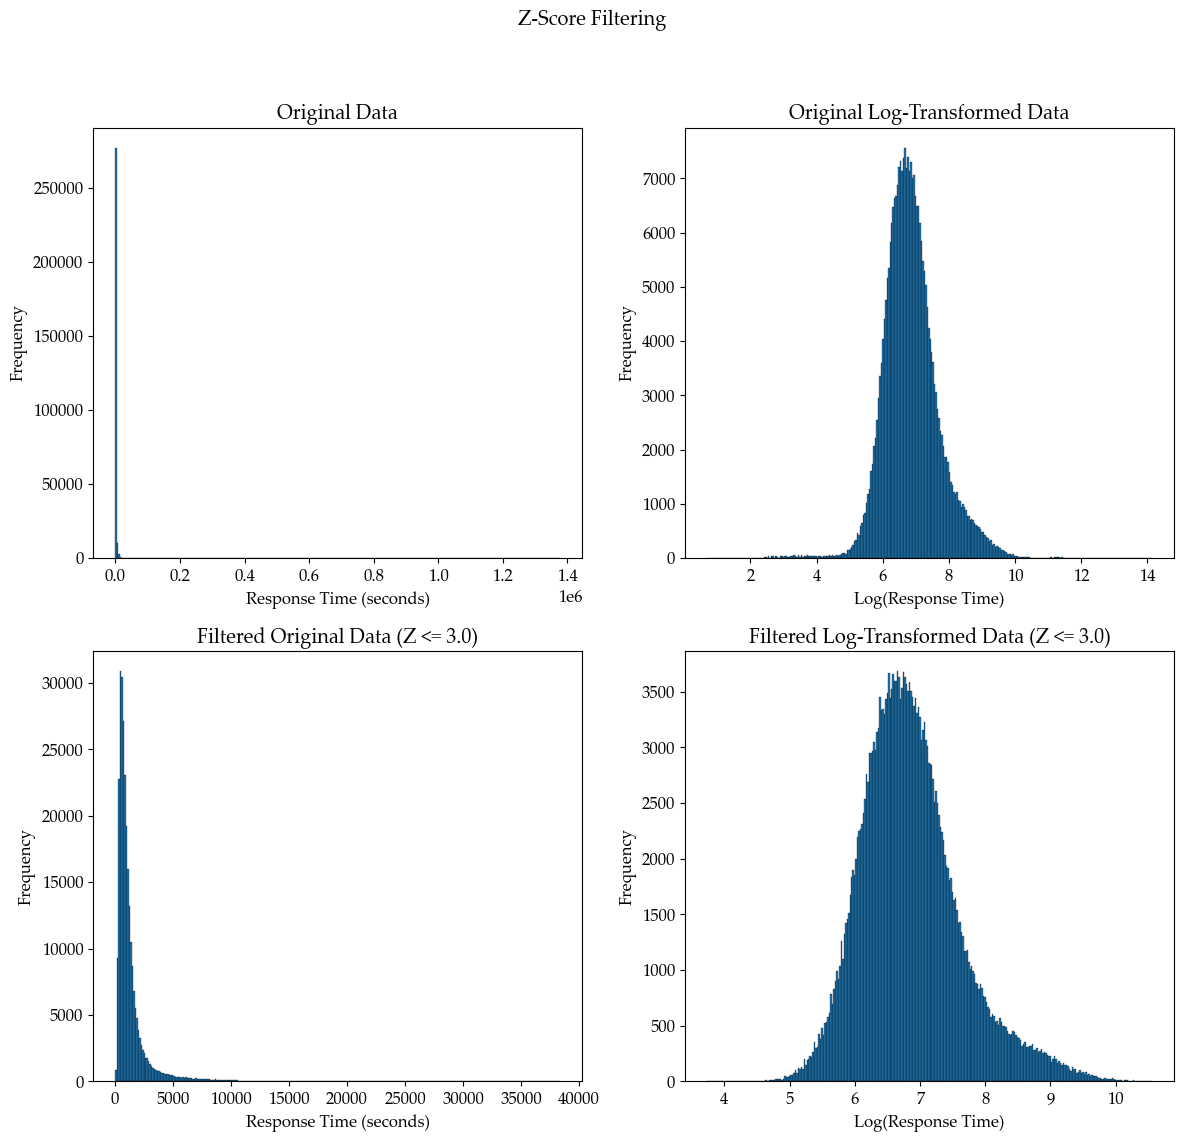

In [36]:
# Set up the plotting grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Adjust the size as needed
fig.suptitle("Z-Score Filtering")

# Original data
axs[0, 0].hist(dataframe['total_response_time'], bins=300, edgecolor='black', linewidth=0.2)
axs[0, 0].set_xlabel('Response Time (seconds)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Original Data')

# Original log-transformed data
axs[0, 1].hist(dataframe_log, bins=300, edgecolor='black', linewidth=0.2)
axs[0, 1].set_xlabel('Log(Response Time)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Original Log-Transformed Data')

# Filtered original scale data
axs[1, 0].hist(dataframe_filtered['total_response_time'], bins=300, edgecolor='black', linewidth=0.2)
axs[1, 0].set_xlabel('Response Time (seconds)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title(f'Filtered Original Data (Z <= {3.0})')

# Filtered log-transformed data
axs[1, 1].hist(dataframe_filtered_log, bins=300, edgecolor='black', linewidth=0.2)
axs[1, 1].set_xlabel('Log(Response Time)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title(f'Filtered Log-Transformed Data (Z <= {3.0})')

# Improve layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.savefig('./plots/z_score_filtering.png', dpi=300, bbox_inches='tight')

# Display the plots
plt.show()